# <font color=blue>HW_Singular Value Decomposition(SVD)</font><br>
## <font color=green>數據分析數學</font>  <font color=green>人工智慧與資料科學學程 </font>
授課教師： 施因澤<br>
學生：吳承澤<br>
學號：5111050018

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os 

   # 圖片來源：自行攝影的照片

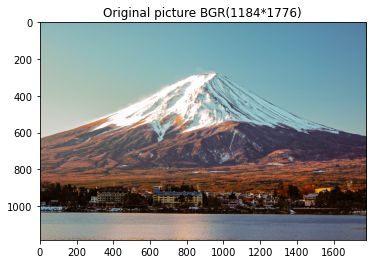

The size of original: 1013067
The image size is: (1776, 1184)


In [2]:
img=Image.open("./Downloads/Mtfuji.JPG")
plt.imshow(img)
plt.title("Original picture BGR(1184*1776)") #Original picture showup
plt.show()
m=img.width
n=img.height
o_size=os.path.getsize("./Downloads/Mtfuji.JPG")
print("The size of original:",o_size)
print("The image size is:",img.size)

# 彩色圖片灰階化

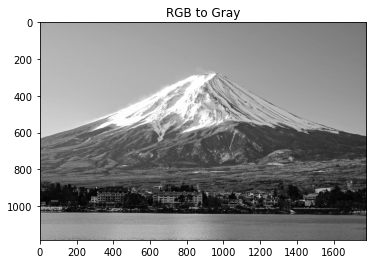

In [3]:
image_gray=img.convert("L")
fuji_gray=np.array(image_gray)
image_gray.save("./image_gray.jpg")
plt.imshow(image_gray,cmap="gray",vmin=0,vmax=255) 
plt.title("RGB to Gray")
plt.show()


# Open CV處理灰階圖片
## 將原圖分成R,G,B三通道

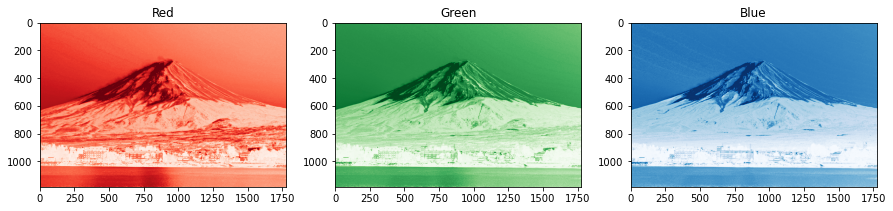

In [4]:
def RGB_model(f,channel):
    if channel==1:     #Red
        return f[:,:,2]
    elif channel == 2: #Green
            return f[:,:,1]
    else:              #Blue
            return f[:,:,0]
image_sp=cv.imread("./Downloads/Mtfuji.JPG",-1)

fig,(a1,a2,a3)=plt.subplots(1,3,sharex=False,sharey=False,figsize=(15,10))

R=RGB_model(image_sp,1)
G=RGB_model(image_sp,2)
B=RGB_model(image_sp,3)
    
a1.imshow(R,cmap="Reds")
a1.set_title("Red")
a2.imshow(G,cmap="Greens")
a2.set_title("Green")
a3.imshow(B,cmap="Blues")
a3.set_title("Blue")
plt.show()



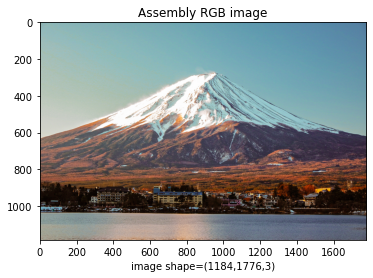

In [5]:
assy=cv.merge([R,G,B])
plt.imshow(assy)
plt.title("Assembly RGB image")
plt.xlabel("image shape=(1184,1776,3)")
plt.show()

# SVD 分解公式

$$ A=USV^T $$

# <font color=orange>灰階圖SVD分解</font>

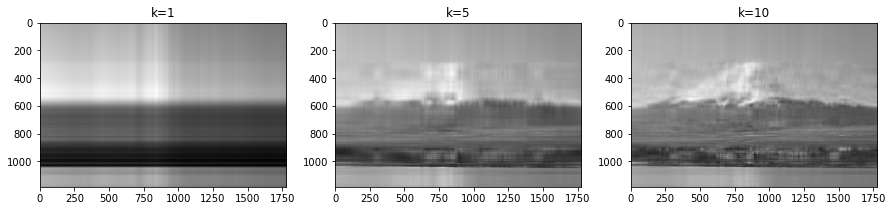

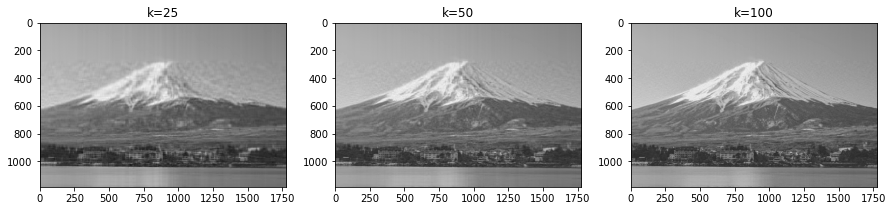

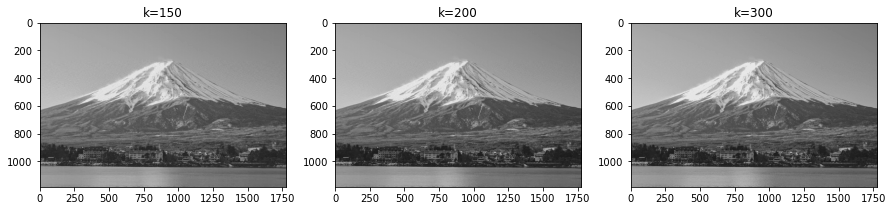

In [6]:
#將GRAY圖轉成矩陣+SVD分解
img_gray=Image.open("./image_gray.jpg")
def svd_compress1(image,k):
    
    #SVD分解
    u,sigma,v=np.linalg.svd(image,full_matrices=0)
    
    AK=u[:,:k].dot(np.diag(sigma[:k])).dot(v[:k,:])
    
    return AK


#保留前k個奇異值， 0<K<724
g_res1=svd_compress1(img_gray,k=1)
g_res2=svd_compress1(img_gray,k=5)
g_res3=svd_compress1(img_gray,k=10)
g_res4=svd_compress1(img_gray,k=25)
g_res5=svd_compress1(img_gray,k=50)
g_res6=svd_compress1(img_gray,k=100)
g_res7=svd_compress1(img_gray,k=150)
g_res8=svd_compress1(img_gray,k=200)
g_res9=svd_compress1(img_gray,k=300)

g_res10=svd_compress1(img_gray,k=350)
g_res11=svd_compress1(img_gray,k=400)
g_res12=svd_compress1(img_gray,k=450)
g_res13=svd_compress1(img_gray,k=500)
g_res14=svd_compress1(img_gray,k=600)
g_res15=svd_compress1(img_gray,k=700)
g_res16=svd_compress1(img_gray,k=800)
g_res17=svd_compress1(img_gray,k=900)
g_res18=svd_compress1(img_gray,k=1000)



fig,(ax1,ax2,ax3)=plt.subplots(1,3,sharex=True,sharey=False,figsize=(15,4.5))
ax1.imshow(g_res1,cmap="gray")
ax1.set_title("k=1")
ax2.imshow(g_res2,cmap="gray")
ax2.set_title("k=5")
ax3.imshow(g_res3,cmap="gray")
ax3.set_title("k=10")

fig,(ax4,ax5,ax6)=plt.subplots(1,3,sharex=True,sharey=False,figsize=(15,4.5))
ax4.imshow(g_res4,cmap="gray")
ax4.set_title("k=25")
ax5.imshow(g_res5,cmap="gray")
ax5.set_title("k=50")
ax6.imshow(g_res6,cmap="gray")
ax6.set_title("k=100")

fig,(ax7,ax8,ax9)=plt.subplots(1,3,sharex=True,sharey=False,figsize=(15,4.5))
ax7.imshow(g_res7,cmap="gray")
ax7.set_title("k=150")
ax8.imshow(g_res8,cmap="gray")
ax8.set_title("k=200")
ax9.imshow(g_res9,cmap="gray")
ax9.set_title("k=300")
plt.show()

# <font color=black>norm2</font> 

In [7]:
def norm2(A,AK):
    n=np.linalg.norm((A-AK),2)
    return n
ld=locals()

for j in range(1,10):
    ld["r_norm"+str(j)]=norm2(img_gray,ld["g_res"+str(j)])
    print(ld["r_norm"+str(j)])

12634.640267156166
7500.462120302448
5085.372112404586
3262.1896177741596
2280.1715952173354
1523.747233074342
1205.6830990938745
1005.6936931454092
749.8174411865997


# 提取SIGMA

In [8]:
ld=locals()

for k in [301]:
    u,sigma,v=np.linalg.svd(img_gray,full_matrices=0)
    k= min(len(sigma)-1, k)
D=np.array(sigma[:k])
for j in [1,5,10,25,50,100,150,200,300]:
    ld["sigma"+str(j)]=D[j]
    print("sigma",(j),"=",ld["sigma"+str(j)])

sigma 1 = 12634.640267156175
sigma 5 = 7500.462120302444
sigma 10 = 5085.372112404585
sigma 25 = 3262.18961777416
sigma 50 = 2280.171595217336
sigma 100 = 1523.7472330743415
sigma 150 = 1205.683099093876
sigma 200 = 1005.6936931454085
sigma 300 = 749.8174411866


# MSE 均方誤差

In [9]:
def mse(A,AK):
    m=np.mean((A/1.0-AK/1.0)**2)
    if m<1.0e-10:
        return 100
    return m

gray_array=np.array(img_gray)    

for j in range(1,19):    
    ld["mse"+str(j)]=mse(gray_array,ld["g_res"+str(j)])
    ld["mse"+str(j)]=round(ld["mse"+str(j)],2)
    print(ld["mse"+str(j)])

762.89
544.51
449.84
327.09
238.65
156.45
113.46
84.65
48.51
36.77
27.69
20.62
15.09
7.52
3.16
0.93
0.12
0.02


# PSNR峰值訊噪比

In [10]:
import math
def psnr(A,AK):
    mse=np.mean((A/1.0-AK/1.0)**2)
    if mse<1.0e-10:
        return 100
    return 10*np.log10(255.0**2/mse)

for i in range(1,19):
    ld["PSNR"+str(i)]=psnr(gray_array,ld["g_res"+str(i)])
    if i<=19:
        ld["PSNR"+str(i)]=round(ld["PSNR"+str(i)],2)
        print(ld["PSNR"+str(i)])

19.31
20.77
21.6
22.98
24.35
26.19
27.58
28.85
31.27
32.48
33.71
34.99
36.34
39.37
43.13
48.43
57.49
65.72


In [11]:
#輸出壓縮後圖片
for i in range(1,10):
    Image.fromarray(ld["g_res"+str(i)]).convert("L").save(f"./after{i}_img.jpg")


# CR資料壓縮比

In [12]:
def CR(origin_size,k):
    reset_size=k*(m+n+1)  #(m+n+1)=2961
    origin_size=(m*n) #2102784
    return origin_size/reset_size

m=img_gray.width #1776
n=img.height #1184

origin_size=fuji_gray.size

k=[1,5,10,25,50,100,150,200,300]

for i in range (1,10):
    ld["CR_N"+str(i)]=CR(origin_size,k[i-1])
    print(round(ld["CR_N"+str(i)],2))

710.16
142.03
71.02
28.41
14.2
7.1
4.73
3.55
2.37


# SS節省空間比率(%)

In [13]:
def SS(origin_size,k):
    reset_size=k*(m+n+1)
    return (1-reset_size/origin_size)*100

for i in range(1,10):
    ld["SS"+str(i)]=SS(origin_size,k[i-1])
    print(round(ld["SS"+str(i)],2))

99.86
99.3
98.59
96.48
92.96
85.92
78.88
71.84
57.76


# 可視化與k值負相關的結果

可視化與Ｋ值負相關結果


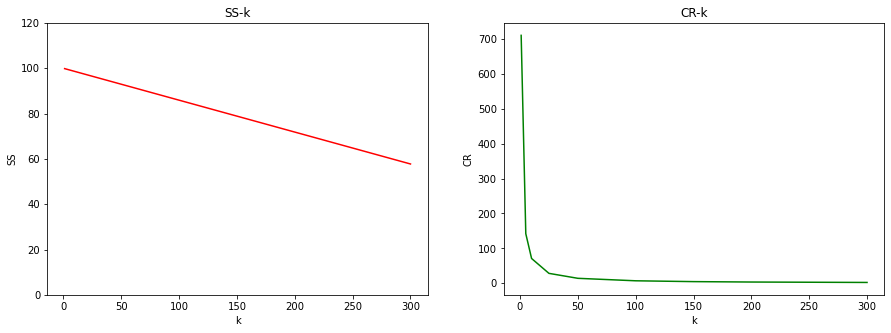

In [14]:
#可視化結果


x=[1,5,10,25,50,100,150,200,300]
y1=[mse1,mse2,mse3,mse4,mse5,mse6,mse7,mse8,mse9]
y2=[SS1,SS2,SS3,SS4,SS5,SS6,SS7,SS8,SS9]
y3=[CR_N1,CR_N2,CR_N3,CR_N4,CR_N5,CR_N6,CR_N7,CR_N8,CR_N9]

fig,(b1,b2)=plt.subplots(1,2,sharex=False,sharey=False,figsize=(15,5))
b1.set_title("SS-k")
b1.set_xlabel("k")
b1.set_ylabel("SS")
b1.set_ylim(0,120)
b1.plot(x,y2,color="red")
print("可視化與Ｋ值負相關結果")


plt.title("CR-k")
b2.set_xlabel("k")
b2.set_ylabel("CR")
b2.plot(x,y3,color="Green")
plt.savefig("./Downloads/ssk.jpg")
plt.show()


# 灰階ＳＶＤ的 k值與sigma(k+1)關係圖

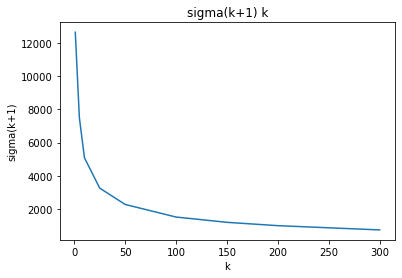

In [15]:
#灰階ＳＶＤ的 k值與sigma(k+1)關係圖
x=[1,5,10,25,50,100,150,200,300]
y=[sigma[1],sigma[5],sigma[10],sigma[25],sigma[50],sigma[100],sigma[150],sigma[200],sigma[300]]

plt.title("sigma(k+1) k")
plt.xlabel("k")
plt.ylabel("sigma(k+1)")
plt.plot(x,y)
plt.savefig("./Downloads/sigmak.jpg")
plt.show()

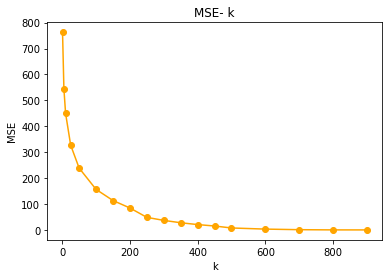

In [16]:
#灰階ＳＶＤ的 k值與MSE關係圖
x=[1,5,10,25,50,100,150,200,250,300,350,400,450,500,600,700,800,900]
y=[mse1,mse2,mse3,mse4,mse5,mse6,mse7,mse8,mse9,mse10,mse11,mse12,mse13,mse14,mse15,mse16,mse17,mse18]
plt.title("MSE- k")
plt.xlabel("k")
plt.ylabel("MSE")
plt.plot(x,y,ls="-",c="orange",marker="o")
plt.savefig("./Downloads/MSE.jpg")
plt.show()

# PSNR與k值正相關

可視化與Ｋ值正相關結果


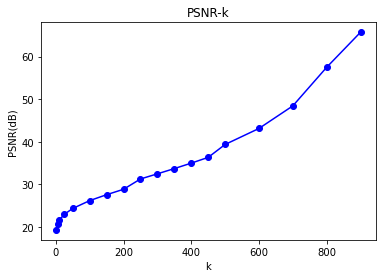

In [17]:
x=[1,5,10,25,50,100,150,200,250,300,350,400,450,500,600,700,800,900]
y=[PSNR1,PSNR2,PSNR3,PSNR4,PSNR5,PSNR6,PSNR7,PSNR8,PSNR9,PSNR10,PSNR11,PSNR12,PSNR13,PSNR14,PSNR15,PSNR16,PSNR17,PSNR18]


plt.title("PSNR-k")
plt.xlabel("k")
plt.ylabel("PSNR(dB)")
plt.plot(x,y,ls="-",c="b",marker="o")
print("可視化與Ｋ值正相關結果")
plt.savefig("./Downloads/PSNRk.jpg")
plt.show()

可視化sigma(k+1)與Norm2


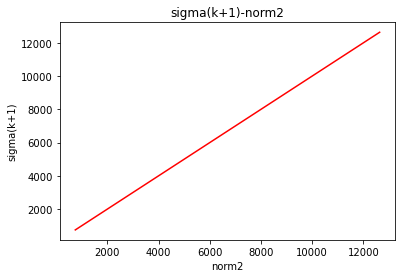

In [18]:
x=[1,5,10,25,50,100,150,200,300]
y1=[sigma1,sigma5,sigma10,sigma25,sigma50,sigma100,sigma150,sigma200,sigma300]
y2=[r_norm1,r_norm2,r_norm3,r_norm4,r_norm5,r_norm6,r_norm7,r_norm8,r_norm9]
plt.title("sigma(k+1)-norm2")
plt.xlabel("norm2")
plt.ylabel("sigma(k+1)")
plt.plot(y1,y2,color="red",label="sigma(k+1),norm2")
print("可視化sigma(k+1)與Norm2")
plt.show()

# 灰階圖壓縮結果

In [19]:
import pandas as pd

result={
    "2-Norm   ":[r_norm1,r_norm2,r_norm3,r_norm4,r_norm5,r_norm6,r_norm7,r_norm8,r_norm9],
    "Sigma(k+1) ":[sigma1,sigma5,sigma10,sigma25,sigma50,sigma100,sigma150,sigma200,sigma300],
    "MSE    ":[mse1,mse2,mse3,mse4,mse5,mse6,mse7,mse8,mse9],
    "PSNR(dB) ":[PSNR1,PSNR2,PSNR3,PSNR4,PSNR5,PSNR6,PSNR7,PSNR8,PSNR9],
    "CR    ":[CR_N1,CR_N2,CR_N3,CR_N4,CR_N5,CR_N6,CR_N7,CR_N8,CR_N9],
    "SS(%)  ":[SS1,SS2,SS3,SS4,SS5,SS6,SS7,SS8,SS9]
}
df=pd.DataFrame(result,index=["k=1","k=10","k=25","k=50","k=100","k=150","k=200","k=250","k=300"])

print(df)


          2-Norm      Sigma(k+1)   MSE      PSNR(dB)       CR        SS(%)  
k=1    12634.640267  12634.640267   762.89      19.31  710.160081  99.859187
k=10    7500.462120   7500.462120   544.51      20.77  142.032016  99.295933
k=25    5085.372112   5085.372112   449.84      21.60   71.016008  98.591867
k=50    3262.189618   3262.189618   327.09      22.98   28.406403  96.479667
k=100   2280.171595   2280.171595   238.65      24.35   14.203202  92.959334
k=150   1523.747233   1523.747233   156.45      26.19    7.101601  85.918668
k=200   1205.683099   1205.683099   113.46      27.58    4.734401  78.878002
k=250   1005.693693   1005.693693    84.65      28.85    3.550800  71.837336
k=300    749.817441    749.817441    48.51      31.27    2.367200  57.756003


# <font color=orange>彩色圖分解(1.ＲＧＢ各自SVD再重組)</font>

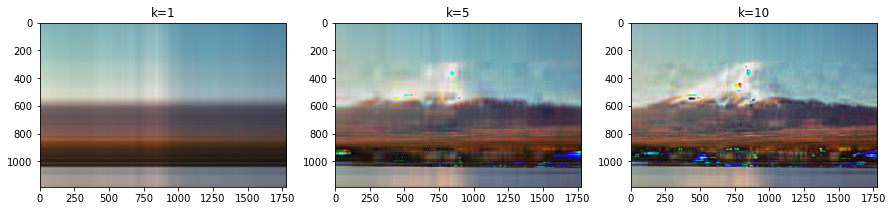

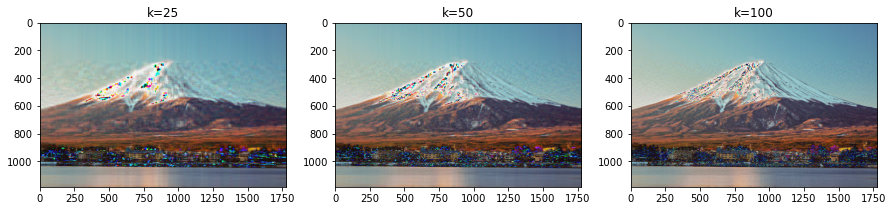

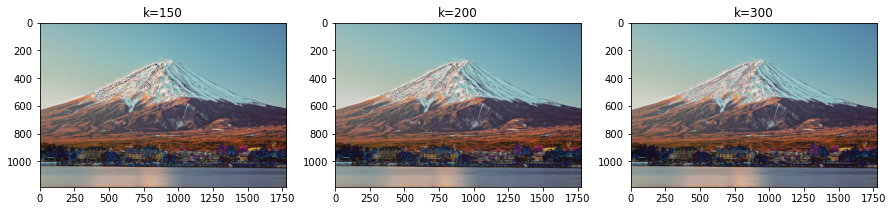

In [20]:
def svd_restore(image,k):
    u2,sigma2,v2=np.linalg.svd(image)
    
    Ak2=np.dot(u2[:,:k],np.dot(np.diag(sigma2[:k]),v2[:k,:]))
    
    return Ak2

for k in[1,5,10,25,50,100,150,200,300,350,400,450,500,600,700,800,900]:
    ld["r_res"+str(k)]=svd_restore(R,k)
    ld["gre_res"+str(k)]=svd_restore(G,k)
    ld["b_res"+str(k)]=svd_restore(B,k)
    
    ld["reI"+str(k)]=np.stack((ld["r_res"+str(k)],ld["gre_res"+str(k)],ld["b_res"+str(k)]),2)
    ld["reI"+str(k)]=np.rint(ld["reI"+str(k)]).astype('uint8')
    
fig,(x1,x2,x3)=plt.subplots(1,3,sharex=True,sharey=False,figsize=(15,8))
x1.imshow(reI1)
x1.set_title("k=1")
x2.imshow(reI5)
x2.set_title("k=5")
x3.imshow(reI10)
x3.set_title("k=10")

fig,(x4,x5,x6)=plt.subplots(1,3,sharex=True,sharey=False,figsize=(15,8))
x4.imshow(reI25)
x4.set_title("k=25")
x5.imshow(reI50)
x5.set_title("k=50")
x6.imshow(reI100)
x6.set_title("k=100")

fig,(x7,x8,x9)=plt.subplots(1,3,sharex=True,sharey=False,figsize=(15,8))
x7.imshow(reI150)
x7.set_title("k=150")
x8.imshow(reI200)
x8.set_title("k=200")
x9.imshow(reI300)
x9.set_title("k=300")

plt.show()

# 彩色圖片2norm

In [21]:
def norm_2(A2,AK2):
    n=np.linalg.norm((A2-AK2),2)
    return n
ld=locals()
image_array=np.array(img)

original_shape=image_array.shape
image_reshape=image_array.reshape((original_shape[0],original_shape[1]*original_shape[2]))

image_reconst1=svd_restore(image_reshape,k=1)
image_reconst2=svd_restore(image_reshape,k=5)
image_reconst3=svd_restore(image_reshape,k=10)
image_reconst4=svd_restore(image_reshape,k=25)
image_reconst5=svd_restore(image_reshape,k=50)
image_reconst6=svd_restore(image_reshape,k=100)
image_reconst7=svd_restore(image_reshape,k=150)
image_reconst8=svd_restore(image_reshape,k=200)
image_reconst9=svd_restore(image_reshape,k=300)
image_reconst10=svd_restore(image_reshape,k=350)
image_reconst11=svd_restore(image_reshape,k=400)
image_reconst12=svd_restore(image_reshape,k=450)
image_reconst13=svd_restore(image_reshape,k=500)
image_reconst14=svd_restore(image_reshape,k=600)
image_reconst15=svd_restore(image_reshape,k=700)
image_reconst16=svd_restore(image_reshape,k=800)
image_reconst17=svd_restore(image_reshape,k=900)
image_reconst18=svd_restore(image_reshape,k=1000)

for i in range (1,19):
    ld["norm_2_"+str(i)]=norm_2(image_reshape,ld["image_reconst"+str(i)])
    print("2-norm_",i,"=",ld["norm_2_"+str(i)])

2-norm_ 1 = 37299.16817612038
2-norm_ 2 = 16445.54623215216
2-norm_ 3 = 9776.239011278274
2-norm_ 4 = 6042.1057912393935
2-norm_ 5 = 4214.325215715666
2-norm_ 6 = 2769.694842360206
2-norm_ 7 = 2166.929515745457
2-norm_ 8 = 1825.1208257817523
2-norm_ 9 = 1361.1628908829966
2-norm_ 10 = 1192.9578831187694
2-norm_ 11 = 1060.5112002654128
2-norm_ 12 = 938.8297219853671
2-norm_ 13 = 837.138948861246
2-norm_ 14 = 660.5383005394681
2-norm_ 15 = 512.5657502281726
2-norm_ 16 = 379.87793110561097
2-norm_ 17 = 261.2708817420872
2-norm_ 18 = 155.30623271851655


# 彩色圖片Sigma矩陣

In [22]:
for k in [1,5,10,25,50,100,150,200,300]:
    uq,sigmaq,vq=np.linalg.svd(image_reshape)
    
    print(sigmaq[k])

37299.168176120336
16445.54623215217
9776.239011278272
6042.105791239401
4214.325215715671
2769.69484236021
2166.9295157454517
1825.1208257817505
1361.1628908829982


# MSE均方誤差

In [23]:
def c_mse(A2,AK2):
    c_m=np.mean((A2/1.0-AK2/1.0)**2)
    if c_m<1.0e-10:
        return 100
    return c_m  

for i in range (1,19):
    ld["c_mse"+str(i)]=c_mse(image_reshape,ld["image_reconst"+str(i)])
    ld["c_mse"+str(i)]=round(ld["c_mse"+str(i)],2)
    print("c_mse",i,"=",ld["c_mse"+str(i)])


c_mse 1 = 1042.58
c_mse 2 = 637.21
c_mse 3 = 511.84
c_mse 4 = 369.32
c_mse 5 = 269.03
c_mse 6 = 176.05
c_mse 7 = 128.47
c_mse 8 = 96.92
c_mse 9 = 57.17
c_mse 10 = 44.26
c_mse 11 = 34.19
c_mse 12 = 26.25
c_mse 13 = 20.0
c_mse 14 = 11.13
c_mse 15 = 5.67
c_mse 16 = 2.51
c_mse 17 = 0.87
c_mse 18 = 0.16


# PSNR峰值訊噪比

In [24]:
def c_psnr(A2,AK2):
    c_mse=np.mean((A2/1.0-AK2/1.0)**2)
    if c_mse<1.0e-10:
        return 100
    return 10*np.log10(255.0**2/c_mse)

for i in range(1,19):
    ld["C_PSNR"+str(i)]=psnr(image_reshape,ld["image_reconst"+str(i)])
    ld["C_PSNR"+str(i)]=round(ld["C_PSNR"+str(i)],2)
    print(ld["C_PSNR"+str(i)])

17.95
20.09
21.04
22.46
23.83
25.67
27.04
28.27
30.56
31.67
32.79
33.94
35.12
37.67
40.6
44.14
48.72
56.22


In [25]:
#輸出檔案
#k =[1,5,10,25,50,100,150,200,300]
reIm1=Image.fromarray(reI1).convert("RGB")

reIm2=Image.fromarray(reI5).convert("RGB")

reIm3=Image.fromarray(reI10).convert("RGB")

reIm4=Image.fromarray(reI25).convert("RGB")

reIm5=Image.fromarray(reI50).convert("RGB")

reIm6=Image.fromarray(reI100).convert("RGB")

reIm7=Image.fromarray(reI150).convert("RGB")

reIm8=Image.fromarray(reI200).convert("RGB")

reIm9=Image.fromarray(reI300).convert("RGB")

for i in range(1,10):
    ld["reIm"+str(i)].save(f"./c_after{i}_img.jpg")


# CR資料壓縮比

In [26]:
def CR(origin_size,k):
    reset_size=k*(m+n+1)  #(m+n+1)=2961
    origin_size=(m*n) #2102784
    return origin_size/reset_size

m=img.width #1776
n=img.height #1184

origin_size=img.size

k=[1,5,10,25,50,100,150,200,300]

for i in range (1,10):
    ld["c_CR"+str(i)]=CR(origin_size,k[i-1])
    ld["c_CR"+str(i)]=round(ld["c_CR"+str(i)],2)
    print(ld["c_CR"+str(i)])

710.16
142.03
71.02
28.41
14.2
7.1
4.73
3.55
2.37


# SS節省空間比率

In [27]:
def SS(origin_size,k):
    reset_size=k*(m+n+1)
    origin_size=(m*n) 
    return (1-reset_size/origin_size)*100

origin_size=img.size
k=[1,5,10,25,50,100,150,200,300]

for i in range(1,10):
    ld["c_SS"+str(i)]=SS(origin_size,k[i-1])
    ld["c_SS"+str(i)]=round(ld["c_SS"+str(i)],2)
    print(ld["c_SS"+str(i)])

99.86
99.3
98.59
96.48
92.96
85.92
78.88
71.84
57.76


# 彩色圖-與k值負相關圖

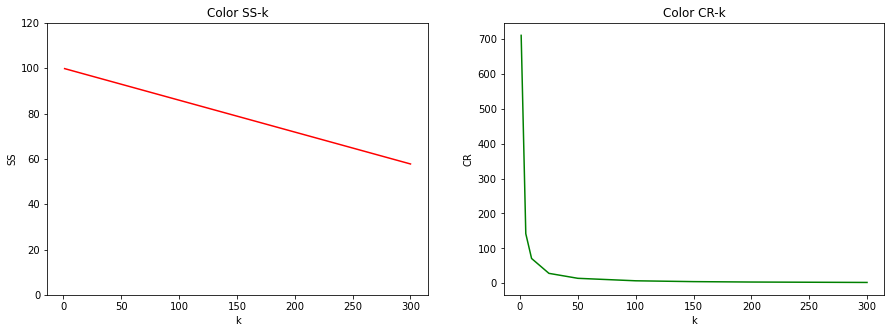

In [28]:
#彩色圖片壓縮的可視化結果

x=[1,5,10,25,50,100,150,200,300]
#y1=[c_mse11,c_mse21,c_mse31,c_mse41,c_mse51,c_mse61,c_mse71,c_mse81,c_mse91]
y2=[c_SS1,c_SS2,c_SS3,c_SS4,c_SS5,c_SS6,c_SS7,c_SS8,c_SS9]
y3=[c_CR1,c_CR2,c_CR3,c_CR4,c_CR5,c_CR6,c_CR7,c_CR8,c_CR9]

fig,(b1,b2)=plt.subplots(1,2,sharex=False,sharey=False,figsize=(15,5))
#line1, = b1.plot(x, y1, color = 'red', linewidth = 3, label = 'mse/10')             
#line2, = b1.plot(x, y2, ls='--',color = 'blue', linewidth = 3, label = 'SS')
#b1.legend(handles = [line1, line2], loc='upper right')  # 顯示圖片
b1.set_title("Color SS-k")
b1.set_xlabel("k")
b1.set_ylabel("SS")
b1.set_ylim(0,120)
b1.plot(x,y2,color="red")


plt.title("Color CR-k")
b2.set_xlabel("k")
b2.set_ylabel("CR")
b2.plot(x,y3,color="Green")
plt.savefig("./Downloads/c_ssk.jpg")
plt.show()

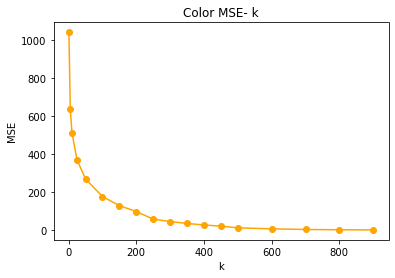

In [29]:
x=[1,5,10,25,50,100,150,200,250,300,350,400,450,500,600,700,800,900]
y=[c_mse1,c_mse2,c_mse3,c_mse4,c_mse5,c_mse6,c_mse7,c_mse8,c_mse9,c_mse10,c_mse11,c_mse12,c_mse13,c_mse14,c_mse15,c_mse16,c_mse17,c_mse18]
plt.title("Color MSE- k")
plt.xlabel("k")
plt.ylabel("MSE")
plt.plot(x,y,ls="-",c="orange",marker="o")
plt.savefig("./Downloads/C_MSE.jpg")
plt.show()

# 彩色圖- sigma(k+1)與k值關係圖

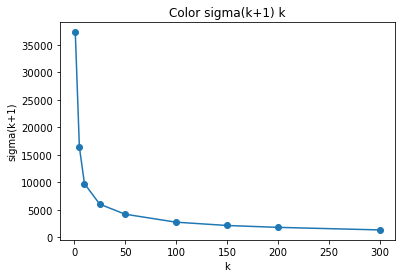

In [30]:
x=[1,5,10,25,50,100,150,200,300]
y=[sigmaq[1],sigmaq[5],sigmaq[10],sigmaq[25],sigmaq[50],sigmaq[100],sigmaq[150],sigmaq[200],sigmaq[300]]

plt.title("Color sigma(k+1) k")
plt.xlabel("k")
plt.ylabel("sigma(k+1)")
plt.plot(x,y,ls="-",marker="o")
plt.savefig("./Downloads/C_sigma.jpg")
plt.show()

# PSNR與k值正相關

可視化與Ｋ值正相關結果


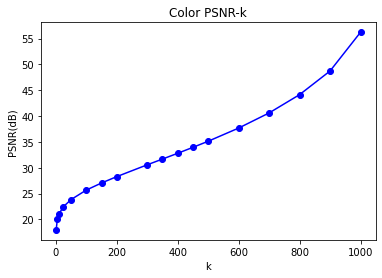

In [31]:
#可視化PSNR結果

x=[1,5,10,25,50,100,150,200,300,350,400,450,500,600,700,800,900,1000]
y=[C_PSNR1,C_PSNR2,C_PSNR3,C_PSNR4,C_PSNR5,C_PSNR6,C_PSNR7,C_PSNR8,C_PSNR9,C_PSNR10,C_PSNR11,C_PSNR12,C_PSNR13,C_PSNR14,C_PSNR15,C_PSNR16,C_PSNR17,C_PSNR18]

plt.title("Color PSNR-k")
plt.xlabel("k")
plt.ylabel("PSNR(dB)")
plt.plot(x,y,ls="-",c="b",marker="o")
print("可視化與Ｋ值正相關結果")
plt.savefig("./Downloads/C_PSNR.jpg")
plt.show()

# 彩色圖-壓縮結果表

In [32]:
import pandas as pd

result={
    "Norm2   ":[norm_2_1,norm_2_2,norm_2_3,norm_2_4,norm_2_5,norm_2_6,norm_2_7,norm_2_8,norm_2_9],
    "Sigma(k+1)":[sigmaq[1],sigmaq[5],sigmaq[10],sigmaq[25],sigmaq[50],sigmaq[100],sigmaq[150],sigmaq[200],sigmaq[300]],
    "MSE     ":[c_mse1,c_mse2,c_mse3,c_mse4,c_mse5,c_mse6,c_mse7,c_mse8,c_mse9],
    "PSNR(dB)":[C_PSNR1,C_PSNR2,C_PSNR3,C_PSNR4,C_PSNR5,C_PSNR6,C_PSNR7,C_PSNR8,C_PSNR9],
    "CR     ":[c_CR1,c_CR2,c_CR3,c_CR4,c_CR5,c_CR6,c_CR7,c_CR8,c_CR9],
    "SS(%)  ":[c_SS1,c_SS2,c_SS3,c_SS4,c_SS5,c_SS6,c_SS7,c_SS8,c_SS9]
}
df=pd.DataFrame(result,index=["k=1","k=10","k=25","k=50","k=100","k=150","k=200","k=250","k=300"])

print(df)


           Norm2       Sigma(k+1)  MSE       PSNR(dB)  CR       SS(%)  
k=1    37299.168176  37299.168176   1042.58     17.95   710.16    99.86
k=10   16445.546232  16445.546232    637.21     20.09   142.03    99.30
k=25    9776.239011   9776.239011    511.84     21.04    71.02    98.59
k=50    6042.105791   6042.105791    369.32     22.46    28.41    96.48
k=100   4214.325216   4214.325216    269.03     23.83    14.20    92.96
k=150   2769.694842   2769.694842    176.05     25.67     7.10    85.92
k=200   2166.929516   2166.929516    128.47     27.04     4.73    78.88
k=250   1825.120826   1825.120826     96.92     28.27     3.55    71.84
k=300   1361.162891   1361.162891     57.17     30.56     2.37    57.76


# <font color=orange>結論</font>
何為最佳k值? <br>
圖像壓縮中典型PSNR在30db~50db之間,越高代表圖像畫質越好<br>
本案中k<=1184<br>
k=300時,PSNR=30.5dB,SS=57.76<br>
研判k佔25%時可以截取到大部分特徵<br>